# In Class Notebook, Week 05

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week05/inClass_week05.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
# import our usual things
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
# also import widgets library
import ipywidgets

## Review from last week

In [3]:
michigan_file = '/Users/jillnaiman/Downloads/michigan_lld.flt'
# can be found with tab completes!

In [4]:
np.fromfile?

In [5]:
michigan = np.fromfile(michigan_file,dtype='f4').reshape((5365,4201))

In [12]:
michigan.reshape(5356,4201)

ValueError: cannot reshape array of size 22538365 into shape (5356,4201)

In [9]:
michigan.reshape?

In [6]:
# take out -9999 tags for missing data
michigan[michigan==-9999] = np.nan

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


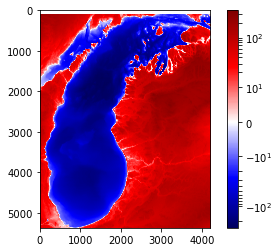

In [8]:
# step 0: even less fancy hardcoding
plt.imshow(michigan, cmap='seismic', norm=matplotlib.colors.SymLogNorm(10))
plt.colorbar() # put in a colorbar
plt.clim(-352, 352) # just to make the colormap centered around 0 (for divergent colormaps)
plt.show()

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


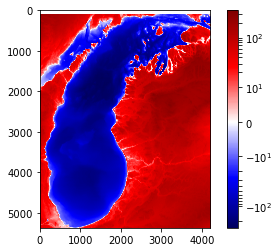

In [7]:
# step 1: hard code any parameters we may want to widgetize(?)
colormap_name = 'seismic'
take_log = True

if take_log:
    norm = matplotlib.colors.SymLogNorm(10) # symmetric log, base 10
else:
    norm = matplotlib.colors.Normalize() # "the usual" linear map
    
plt.imshow(michigan, cmap=colormap_name, norm=norm)
plt.colorbar() # put in a colorbar
plt.clim(-352, 352) # just to make the colormap centered around 0 (for divergent colormaps)
plt.show()

In [13]:
# step 2: turn this into a function with "hard coded" values as inputs
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

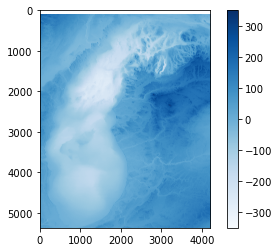

In [14]:
# step 2.5 -- try out your function!
michigan_plot('Blues',take_log=False)

In [15]:
# Step 3: use .interact to widgetize it!
@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

In [17]:
buildings = pd.read_csv('https://uiuc-ischool-dataviz.github.io/is445_spring2022/week03/data/building_inventory.csv',
                       na_values={'Square Footage':0,
                                 'Year Acquired':0, 
                                 'Year Constructed':0,
                                 'Floors':0})

In [18]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


In [19]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [20]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

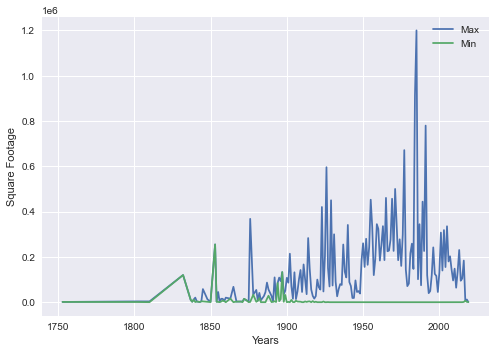

In [24]:
# step 1: hard-code something
style = 'seaborn'

with plt.style.context(style):
    plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
    plt.plot(stats['min'], label='Min')
    plt.xlabel('Years')
    plt.ylabel('Square Footage')
    plt.legend()
    plt.show()

In [23]:
stats['max']

Year Acquired
1753.0      1200.0
1802.0      3594.0
1810.0      3432.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    105000.0
2016.0    184000.0
2017.0      6720.0
2018.0     12000.0
2019.0       760.0
Name: max, Length: 171, dtype: float64

In [25]:
# step 2 -- make into a function
#style = 'seaborn'

def make_buildings_plot(style):
    with plt.style.context(style):
        plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        plt.plot(stats['min'], label='Min')
        plt.xlabel('Years')
        plt.ylabel('Square Footage')
        plt.legend()
        plt.show()

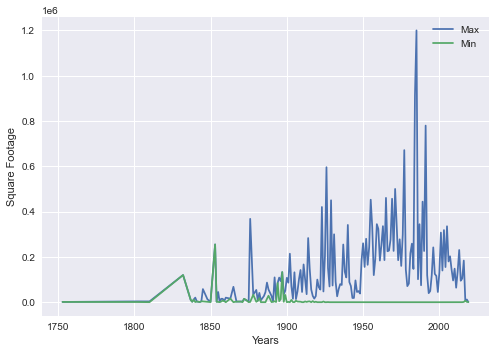

In [26]:
# 2.5 test the function
make_buildings_plot('seaborn')

In [32]:
# step 3: widgetize it!

@ipywidgets.interact(style=plt.style.available)
def make_buildings_plot(style):
    with plt.style.context(style):
        plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        plt.plot(stats['min'], label='Min')
        #plt.plot(stats['max']*2)
        plt.xlabel('Years')
        plt.ylabel('Square Footage')
        #plt.yscale('log')
        plt.legend()
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

In [33]:
@ipywidgets.interact(style=plt.style.available)
def make_buildings_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        ax.plot(stats['min'], label='Min')
        ax.set_xlabel('Years')
        ax.set_ylabel('Square Footage')
        #plt.yscale('log')
        ax.legend()
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

## Widgets on their own

In [34]:
itext = ipywidgets.IntText()
itext

IntText(value=0)

In [35]:
itext.value = 10

In [36]:
ip = ipywidgets.IntProgress(value=90)
ip

IntProgress(value=90)

In [37]:
irange = ipywidgets.IntSlider(min=0, max=100, step=1)

In [38]:
irange

IntSlider(value=0)

In [39]:
irange

IntSlider(value=89)

We want to figure out a way to link the progress bar's value to the changes we make on the irange slider.

In [40]:
ip.keys # keys of our progress bar widget

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [41]:
irange.keys # keys for the integer range slider

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [42]:
ip

IntProgress(value=90)

In [43]:
ip.value = 10

In [44]:
irange

IntSlider(value=90)

In [45]:
irange.value = 50

In [46]:
ipywidgets.jslink?

In [47]:
# create a link on the "frontend" (whatever that means right now)
ipywidgets.jslink((ip,'value'),(irange,'value'))

Link(source=(IntProgress(value=10), 'value'), target=(IntSlider(value=50), 'value'))

In [48]:
ip

IntProgress(value=10)

In [49]:
irange

IntSlider(value=10)

In [50]:
# use the layout widget "VBox" to put them in a a vertical stack
ipywidgets.VBox([ip,irange])

In [54]:
# linking on the backend with Python
ip2 = ipywidgets.IntProgress(value=90, max=200)
irange2 = ipywidgets.IntSlider(min=0,max=200,step=1)
ipywidgets.link((ip2,'value'),(irange2,'value'))
ipywidgets.VBox([ip2,irange2])

In [53]:
ipywidgets.IntProgress?

In [55]:
button = ipywidgets.Button(description="I am a button.")
button

Button(description='I am a button.', style=ButtonStyle())

I have been clicked! Woo.
I have been clicked! Woo.


In [56]:
# let's define a function I want to run everytime I click this button
def say_click(event):
    print("I have been clicked! Woo.")

In [58]:
#button.keys function doesn't show up!

In [59]:
button.on_click(say_click)

In [60]:
# let's connect multiple widgets with functions
ip = ipywidgets.IntProgress()
ip

IntProgress(value=0)

In [61]:
button_plus = ipywidgets.Button(description="+10")
button_plus

Button(description='+10', style=ButtonStyle())

In [62]:
button_minus = ipywidgets.Button(description='-10')
button_minus

Button(description='-10', style=ButtonStyle())

In [63]:
# before linking anything, let's lay them out in a nice way
ipywidgets.HBox([button_minus, ip, button_plus])

In [64]:
ip.value

0

In [65]:
ip.value=50

In [66]:
# a function that will decrease by 10 the progress bar when I click on the "button_minus"
# widget
def click_down(event):
    ip.value -= 10

In [67]:
# attach this function to my button minus widget
button_minus.on_click(click_down)

In [68]:
# on clicking the button_plus
def click_up(event):
    ip.value += 10
button_plus.on_click(click_up)

In [69]:
# tie a colorpicker and a slider
islider = ipywidgets.IntSlider(min=0,max=10,step=1, orientation='vertical')

In [70]:
islider

IntSlider(value=0, max=10, orientation='vertical')

In [71]:
islider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [72]:
islider.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width',
 'handle_color']

In [73]:
islider.style.handle_color='#750075' # HTML style HEX code for a color (16 mill)

In [74]:
islider

IntSlider(value=5, max=10, orientation='vertical', style=SliderStyle(handle_color='#750075'))

In [75]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

In [76]:
ipywidgets.jslink((cp,'value'),(islider.style,'handle_color'))

Link(source=(ColorPicker(value='#f7f7f7'), 'value'), target=(SliderStyle(handle_color='#750075'), 'handle_colo…

In [77]:
ipywidgets.VBox([cp,islider])

In [78]:
class MyObject():
    name = 'unnamed'
    age = 0

In [79]:
# new variable of this type of class
my_obj = MyObject()

In [80]:
my_obj.name

'unnamed'

In [81]:
my_obj.age

0

In [82]:
my_obj.name = 'Bob'; my_obj.age = 47

In [83]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


In [85]:
my_obj.name = 'Linda'; my_obj.age = 45

In [86]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Linda and I am 45 years old


In [87]:
import traitlets

In [89]:
class MyTraitletObject(traitlets.HasTraits):
    name = traitlets.Unicode("unnamed")
    age = traitlets.Int(0)

In [90]:
my_tobj = MyTraitletObject()

In [91]:
my_tobj.name

'unnamed'

In [92]:
my_tobj.age

0

In [93]:
my_tobj.name = 'Bob'
my_tobj.age = 47

In [94]:
print('Hello my name is:', my_tobj.name, 'and I am', my_tobj.age, 'years old')

Hello my name is: Bob and I am 47 years old


In [95]:
def name_change(change):
    print(change)
    
my_tobj.observe(name_change, ['name'])
# .observe is going to "watch" for changes in the traits of my_tobj
# name_change is the name of the function with the action we want
# ['name'] is the (potentially list) of traits we want observed

In [96]:
my_tobj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7f9d70904650>, 'type': 'change'}


In [97]:
def name_change2(change):
    #print('Hello my name is:', my_tobj.name, 'and I am', my_tobj.age, 'years old')
    print('Hello my name is:', change['new'], 'and I am', change['owner'].age, 'years old')
    
my_tobj.observe(name_change2, ['name'])

In [98]:
my_tobj.name = 'Bob'

{'name': 'name', 'old': 'Linda', 'new': 'Bob', 'owner': <__main__.MyTraitletObject object at 0x7f9d70904650>, 'type': 'change'}
Hello my name is: Bob and I am 47 years old


In [99]:
# could re-define my_tobj or we can "unobserve" a function
my_tobj.unobserve(name_change,['name'])

In [100]:
my_tobj.name = 'Linda'

Hello my name is: Linda and I am 47 years old


In [102]:
my_tobj.age = 45

In [103]:
def age_change(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')
my_tobj.observe(age_change, ['age'])

In [104]:
my_tobj.name, my_tobj.age = 'Louise', 8

Hello my name is: Louise and I am 45 years old
Hello, my name is Louise and I am 8 years old


In [105]:
def print_age_change(change):
    print(change)
my_tobj.observe(print_age_change,['age'])

In [106]:
my_tobj.age = 13

Hello, my name is Louise and I am 13 years old
{'name': 'age', 'old': 8, 'new': 13, 'owner': <__main__.MyTraitletObject object at 0x7f9d70904650>, 'type': 'change'}


In [107]:
my_tobj.unobserve(print_age_change, ['age'])

In [108]:
my_tobj.age = 8

Hello, my name is Louise and I am 8 years old


## Some widget customization

(Possible extension to the HW, but not required!)

In [109]:
# Step 3: use .interact to widgetize it!
@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

We want to mess with the style of the defaults for our widgets, so we can start building up our own.

In [110]:
ipywidgets.Dropdown?

In [111]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps())
cmap_widget

Dropdown(options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_…

In [112]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps(), value='terrain')
cmap_widget

Dropdown(index=154, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'Bu…

In [113]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [114]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps(),
                                 value='terrain',
                                 description='Select a colormap:')
cmap_widget

Dropdown(description='Select a colormap:', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG…

In [115]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [116]:
cmap_widget.layout.width='800px' #changes the size of the drop down, not quite what we want

In [120]:
cmap_widget.layout.width = '300px'
cmap_widget

Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), options=('Accent', 'Accent…

In [121]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [122]:
cmap_widget.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width']

In [123]:
cmap_widget.style.description_width = '300px'
cmap_widget

Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), options=('Accent', 'Accent…

In [124]:
cmap_widget.style.description_width = 'initial'
cmap_widget

Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), options=('Accent', 'Accent…

In [125]:
ipywidgets.Checkbox?

In [126]:
log_check = ipywidgets.Checkbox(value=True, description='Take log of colormap?')
log_check

Checkbox(value=True, description='Take log of colormap?')

In [127]:
#@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
@ipywidgets.interact(colormap_name=cmap_widget, take_log=log_check)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), opti…

## Some notes about the homework (and the dataset)

In [132]:
ufos = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/master/week05/data/ufo-scrubbed-geocoded-time-standardized-00.csv', 
                  names=["date", "city", "state", "country", 
                        "shape", "duration_seconds", "duration", 
                        "comment", "report_date", "latitude", "longitude"], 
                  parse_dates = ["date", "report_date"]) # tell pandas that these columns are dates

In [133]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [134]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [136]:
# fill NaN's with something a little more useful
ufos = ufos.fillna({'country':'unknown', 
                   'state':'unknown', 
                   'shape':'unknown'})

In [137]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [138]:
# downsample our data by pulling random indicies and only using rows that 
# correspond to those indicies
nsamples = 1000
downSampleMask = np.random.choice(range(len(ufos)-1),nsamples,replace=False)
# pull from 0-80331 a total of 1000 numbers, don't replace (don't double count)

In [140]:
downSampleMask

array([13722, 38416, 41520, 41194, 22065, 46747, 73167, 79298, 69078,
       69287, 51329, 28703, 71178, 70983, 11103,  5070, 65528, 57170,
         710, 46314, 24085, 57591, 37794, 29972, 71750, 42016, 70447,
       13948, 32661,  6447, 73536,  1426, 49602, 75809, 15892, 36884,
       25020, 35538, 20943, 32515,  4553, 41880, 48255, 35644,  7886,
       74832, 56523, 37121,  5461,  2830, 18588, 32081, 12318, 25722,
       46974, 13070, 72558, 61006, 36746, 75482, 26199, 78397, 58779,
        4773, 62979, 72163, 74029, 46084, 68551, 19086, 22464, 75586,
       27034, 64178, 23811, 46414, 16670,  6739, 57552, 36725, 32665,
       55412, 56448, 38477, 59199, 45197, 72888, 48523, 50174, 60204,
       73301, 18915, 68321, 76226, 32544, 67277,  7640, 28752, 79922,
       14101, 44301, 78466, 58968, 26519, 56926,  3978, 22992, 28286,
       76860, 31642, 49881, 23239, 62011, 76795, 20052, 19278, 80186,
       45814,  3407, 22890,  6871,  3570, 76240, 63972, 51822, 57301,
       24203, 13022,

In [141]:
ufosDS = ufos.loc[downSampleMask]

In [142]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
13722,2013-11-29 18:15:00,kennewick,wa,us,triangle,1500.0,25 minutes,Triangle lights. Kennewick&#44 WA&#44 11/29/13.,2013-12-02,46.211389,-119.136111
38416,1996-04-22 21:30:00,edmonds,wa,us,unknown,4.0,4 sec.,Man repts. seeing a round&#44 &quot;shapeless&...,1999-11-02,47.810833,-122.376111
41520,1973-05-01 09:00:00,gaithersburg,md,us,disk,240.0,3-4 minutes,Disk-shaped object with sequentially-flashing ...,2005-12-16,39.143333,-77.201667
41194,2000-05-10 22:00:00,charlotte,nc,us,triangle,900.0,15 minutes,Silent craft floated over my head,2000-06-06,35.226944,-80.843333
22065,2010-12-03 23:00:00,miami/fort lauderdale,fl,unknown,light,259200.0,3 days,Beams of Energy &amp; Illuminated Particles&#4...,2011-01-05,27.838145,-80.485438
...,...,...,...,...,...,...,...,...,...,...,...
17765,2009-12-12 19:00:00,daly city,ca,us,triangle,1800.0,30 minutes,This is about as strange and bizzarre as it ca...,2010-02-14,37.705833,-122.460833
33241,2013-03-23 20:15:00,longwood,fl,us,sphere,180.0,2-3 minutes,2 Orange Orbs in the evening sky.,2013-05-15,28.702778,-81.338611
49011,1993-06-15 21:00:00,mt. isa (australia),unknown,unknown,unknown,30.0,30 sec,Driving home i saw a light hovering in the sky...,2000-12-02,-20.724705,139.497462
66252,1977-08-15 02:00:00,brea,ca,us,light,25.0,25 seconds,A light emitted other other lights,2003-08-01,33.916667,-117.899167


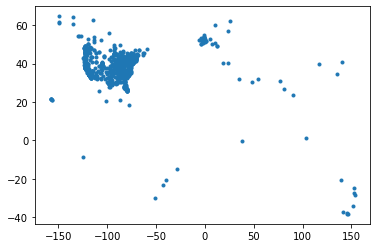

In [143]:
plt.plot(ufosDS['longitude'], ufosDS['latitude'], '.')
plt.show()

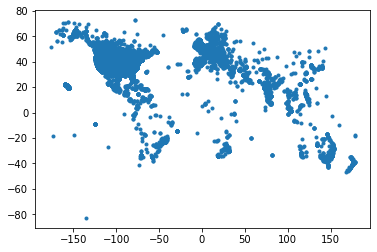

In [144]:
plt.plot(ufos['longitude'], ufos['latitude'], '.')
plt.show()

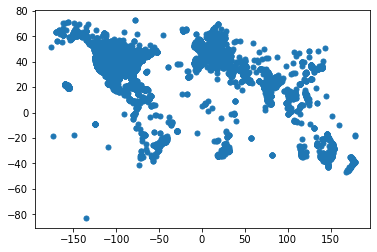

In [147]:
#plt.plot(ufos['longitude'], ufos['latitude'], '.', ms=20)
plt.plot(ufos['longitude'], ufos['latitude'], '.', markersize=10)

plt.show()

In [148]:
plt.scatter?

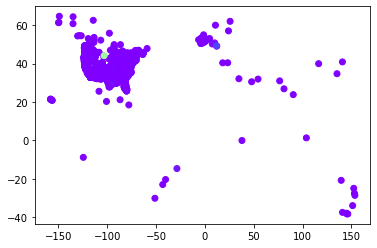

In [149]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=ufosDS['duration_seconds'], cmap='rainbow') # we know there are problems with rainbow!
plt.show()

In [150]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(0.5, 604800.0)

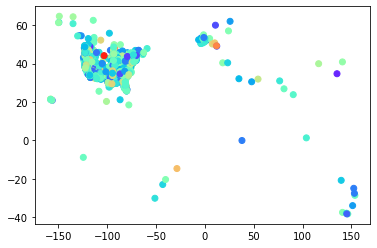

In [151]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=np.log10(ufosDS['duration_seconds']), cmap='rainbow') # we know there are problems with rainbow!
plt.show()

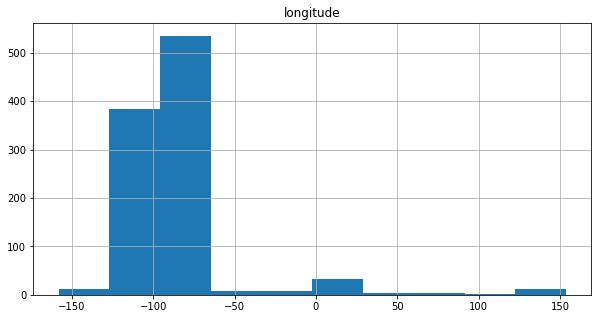

In [152]:
# quick hint
fig, ax = plt.subplots(figsize=(10,5))
ufosDS.hist(column='longitude', ax=ax)
plt.show()

In [153]:
ufosDS.hist?

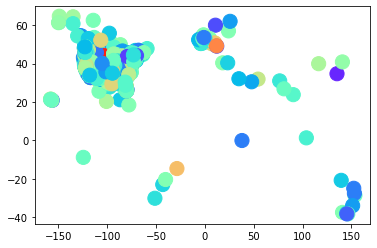

In [158]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=np.log10(ufosDS['duration_seconds']), 
            cmap='rainbow', s=200) # we know there are problems with rainbow!
plt.show()

In [159]:
plt.scatter?